In [13]:
import yfinance
import pandas as pd
import numpy as np
import mplfinance

[*********************100%***********************]  1 of 1 completed


/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


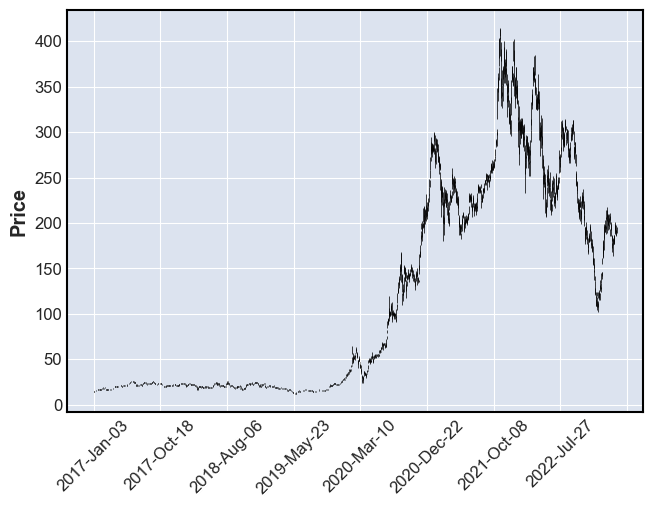

In [22]:
data: pd.DataFrame = yfinance.download('TSLA', start='2017-01-01', interval='1d')
mplfinance.plot(data)

In [25]:
train = data[data.index.year <= 2021]
test = data[data.index.year > 2021]

In [39]:
def engineer(frame: pd.DataFrame):
    frame['Close_Shift'] = frame['Adj Close'].shift(periods=1)
    frame['Return'] = (frame['Adj Close'] / frame['Close_Shift'] - 1) * 100
    frame['Target'] = np.where(frame['Return'].shift(-1) > 0, 1, 0)
    return frame

In [40]:
train = engineer(train)
test = engineer(test)

/var/folders/99/xk1wrcr12tg689hj2_c343l00000gp/T/ipykernel_92364/1905795998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Close_Shift'] = frame['Adj Close'].shift(periods=1)
/var/folders/99/xk1wrcr12tg689hj2_c343l00000gp/T/ipykernel_92364/1905795998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Return'] = (frame['Adj Close'] / frame['Close_Shift'] - 1) * 100
/var/folders/99/xk1wrcr12tg689hj2_c343l00000gp/T/ipykernel_92364/1905795998.py:4: SettingWithCopyWarning: 
A value is trying 